# seaborn 라이브러리

## 1. 환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://bit.ly/3JiY7ZZ')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://bit.ly/3qmthqZ')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


In [6]:
# 코스피 지수
stock = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/KOSPI.csv')
stock['Date'] = pd.to_datetime(stock['Date'])
stock['Year'] = stock.Date.dt.year
stock['Month'] = stock.Date.dt.month
stock['Weekday'] = stock.Date.dt.weekday
stock.head()

,Date,Open,High,Low,Close,Volume,DataSplit,Year,Month,Weekday
0,2014-09-30,2023.18,2029.17,2007.30,2020.09,322812,0,2014,9,1
1,2014-10-01,2013.47,2013.47,1989.84,1991.54,351581,0,2014,10,2
2,2014-10-02,1984.43,1985.06,1966.17,1976.16,322656,0,2014,10,3
3,2014-10-06,1987.89,1988.39,1968.30,1968.39,325078,0,2014,10,0
4,2014-10-07,1979.83,1982.96,1966.22,1972.91,328234,0,2014,10,1


In [7]:
print(stock['Volume'].isna().sum())

0


## 2. seaborn 다양한 차트들

### 1) 기본 차트들

① iris의 Petal.Length 에 대해서, Species 별로 비교하는 차트를 그려봅시다.
    * histplot()
    * kdeplot()
    * boxplot()

* histogram : sns.histplot

<AxesSubplot:xlabel='Petal.Length', ylabel='Count'>

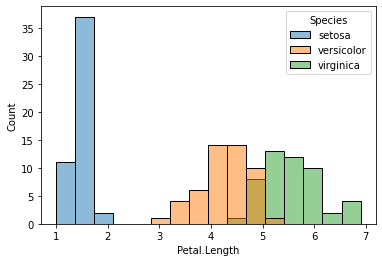

In [8]:
sns.histplot(data = iris, x = 'Petal.Length', bins=16, hue='Species')

* densityplot : sns.kdeplot

<AxesSubplot:xlabel='Petal.Length', ylabel='Density'>

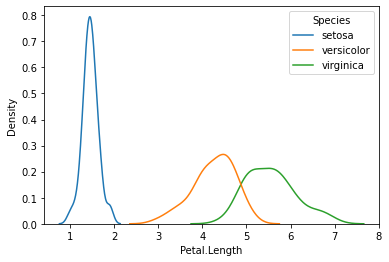

In [9]:
sns.kdeplot(data = iris, x = 'Petal.Length', hue = 'Species')

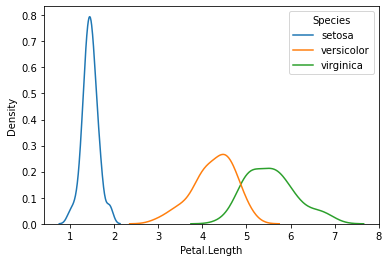

* sns.boxplot

<AxesSubplot:xlabel='Species', ylabel='Petal.Length'>

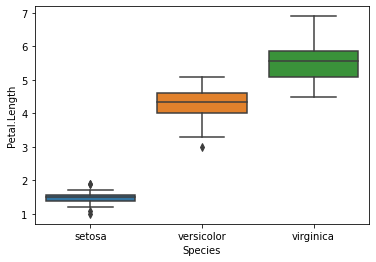

In [10]:
sns.boxplot(data = iris, y = 'Petal.Length', x = 'Species')

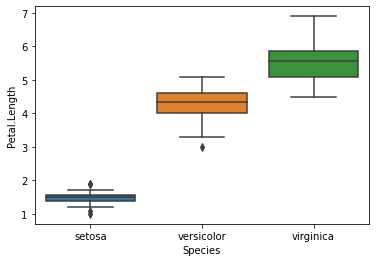

### 2) distplot : histogram + density plot

① titanic['Fare'] 에 대해서 distplot을 그려 봅시다.
* bin의 개수를 10 ~ 50 사이에서 조절해 봅시다.
* 히스토그램을 꾸며 봅시다. hist_kws = {'edgecolor':'grey'}


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


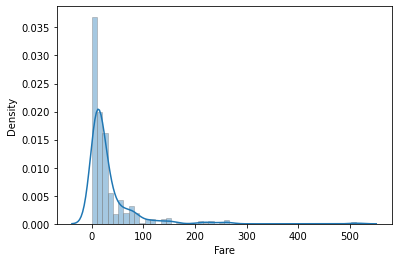

② boston['medv'] 에 대해서 distplot을 그려 봅시다.

* bin의 개수를 10 ~ 50 사이에서 조절해 봅시다.
* 히스토그램을 꾸며 봅시다. hist_kws = {'edgecolor':'grey'}

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medv', ylabel='Density'>

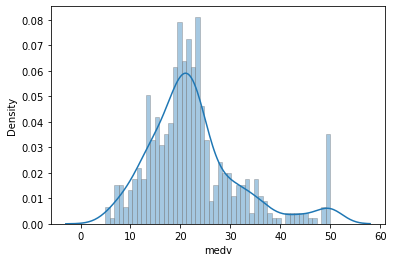

In [11]:
sns.distplot(boston['medv'], bins = 50, hist_kws = dict(edgecolor = 'grey'))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


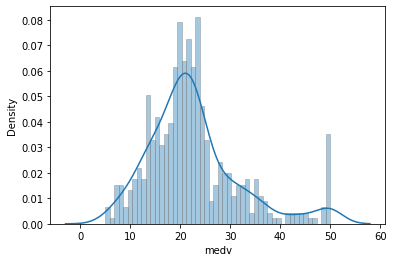

###  3) joinplot : scatter + histogram(혹은 density plot)

① titanin['Age']와 titanic['Fare']에 대해 join plot을 그려봅시다.

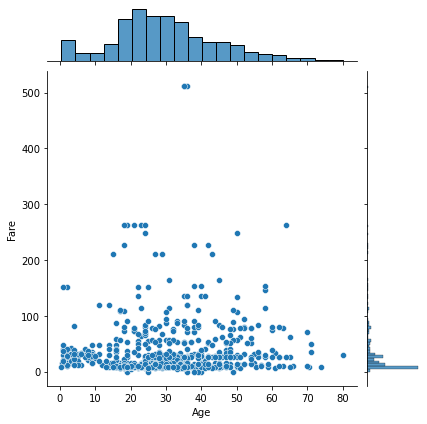

In [12]:
sns.jointplot(x='Age', y='Fare', data = titanic)
plt.show()

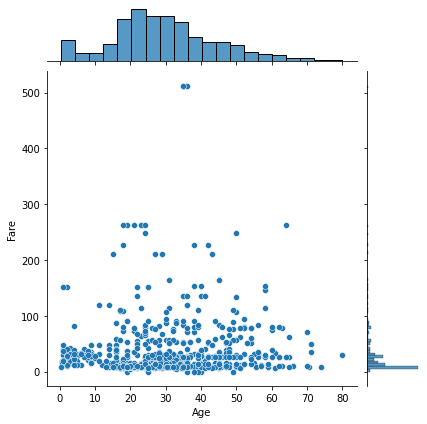

② titanin['Age']와 titanic['Fare']에 대해 join plot을 그려봅시다. 단, 생존여부(Survived) 별로 구분.

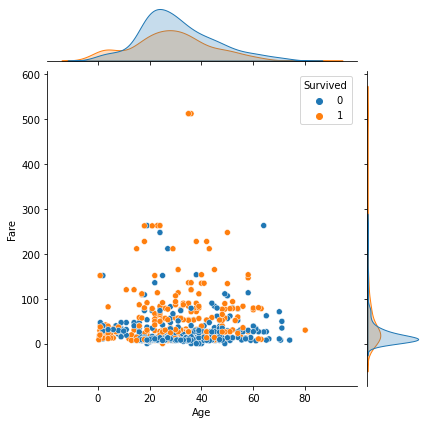

In [13]:
sns.jointplot(x='Age', y='Fare', data=titanic, hue='Survived')
plt.show()

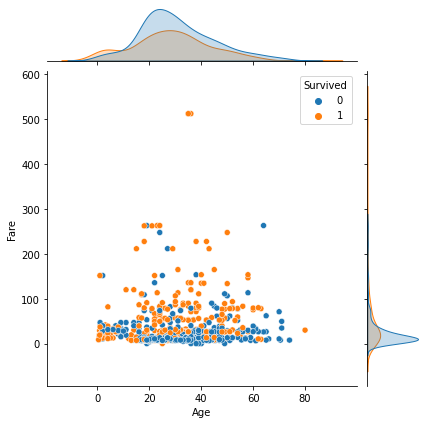

### 4) pairplot : scatter + histogram(혹은 density plot) 확장


① air 데이터셋에 대해서 pairplot을 그려 봅시다.

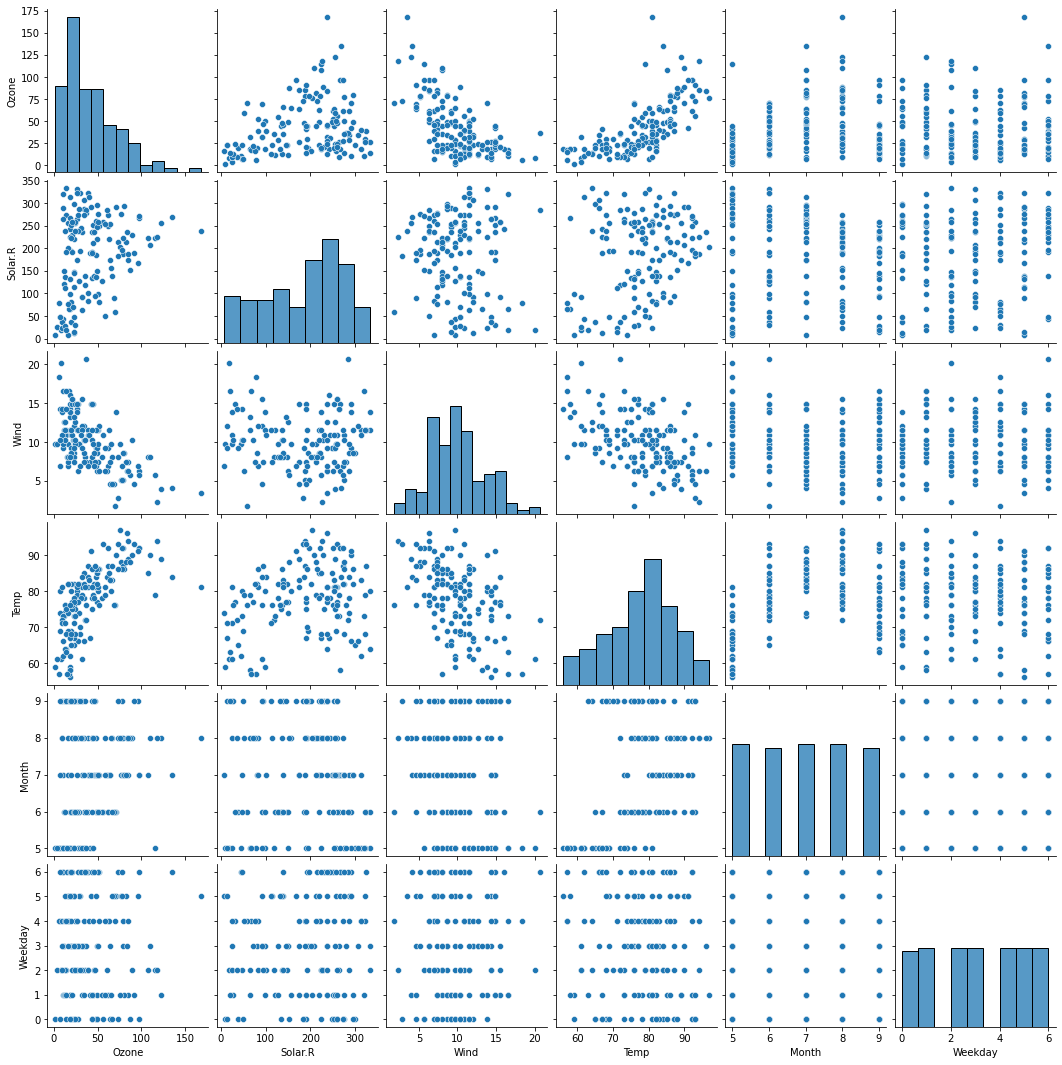

In [14]:
sns.pairplot(air)
plt.show()

# month, weekday를 추가해서 행열이 늘어난 것임

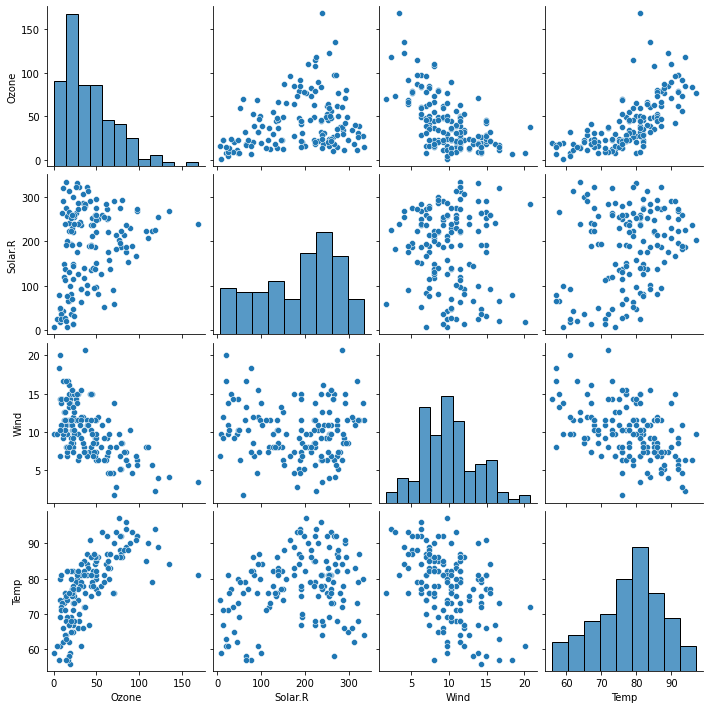

② air 데이터셋에 대해서 pairplot을 그릴 때, 월별로 구분해서)

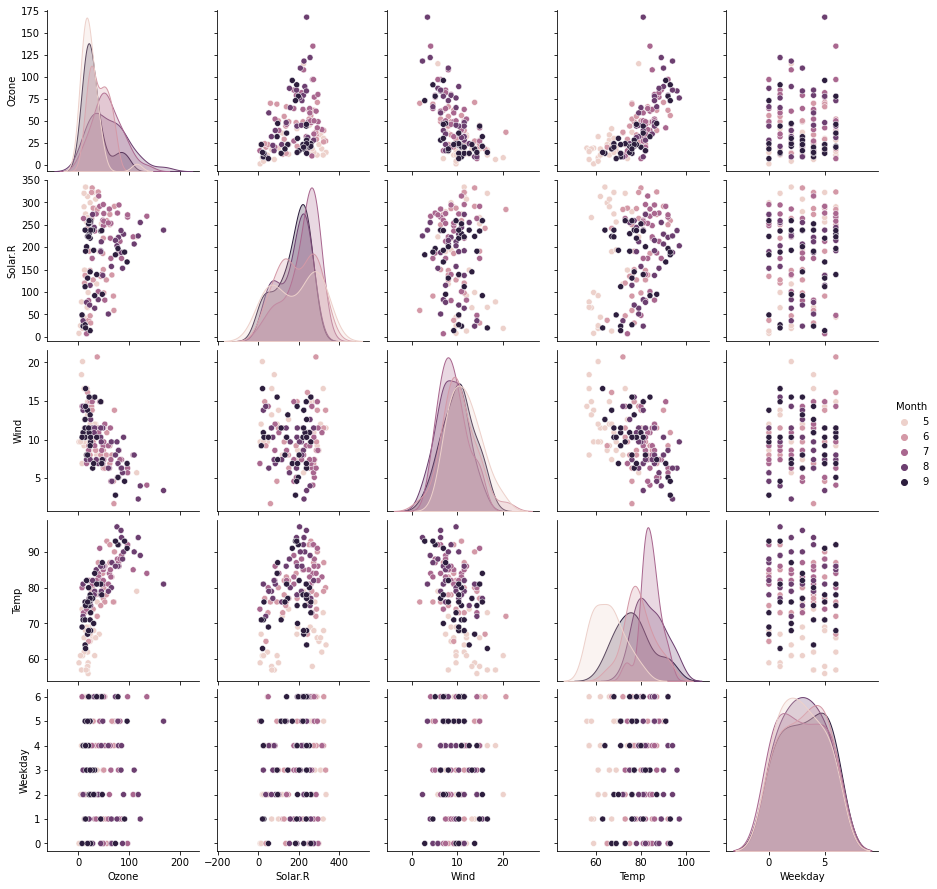

In [15]:
sns.pairplot(air, hue='Month')
plt.show()

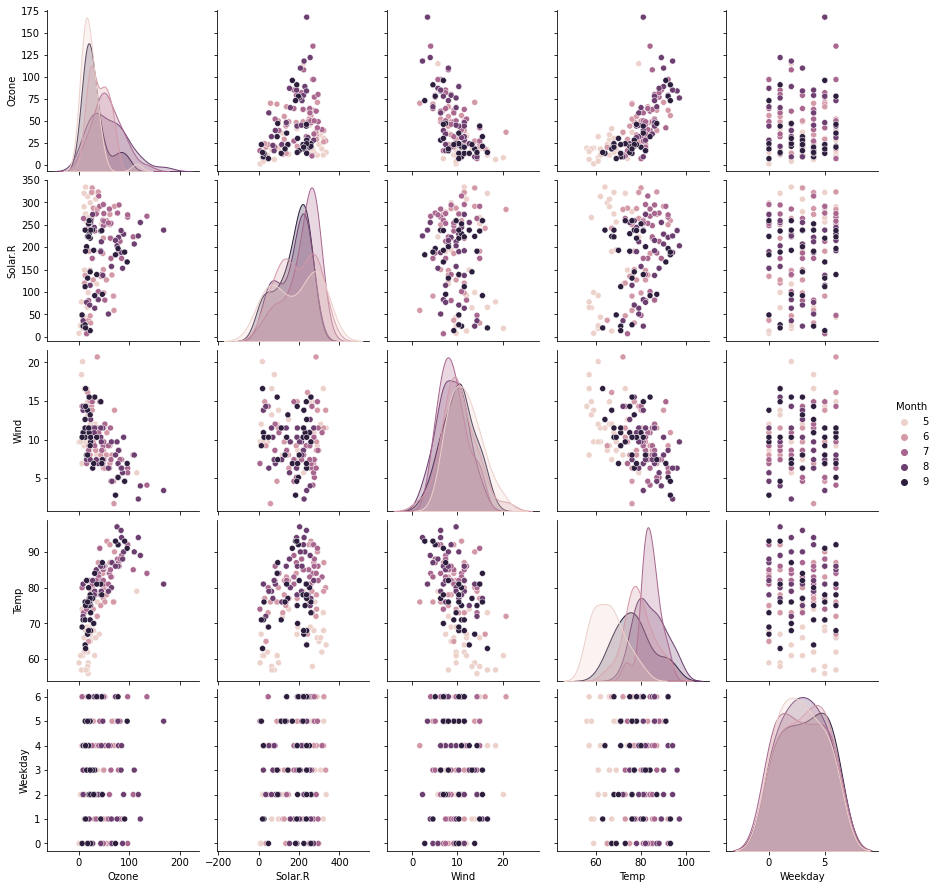

### 5) countplot : 집계 + bar plot

① boston['chas'] 에 대해 countplot을 그려 봅시다.

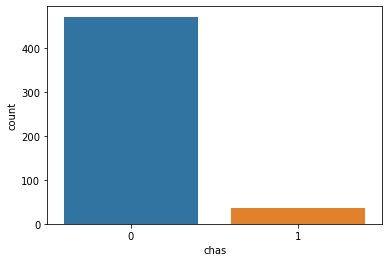

In [16]:
sns.countplot(x='chas', data=boston)
plt.show()

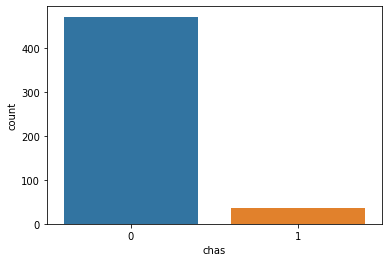

② titanic['Survived']에 대해 countplot을 그려 봅시다.

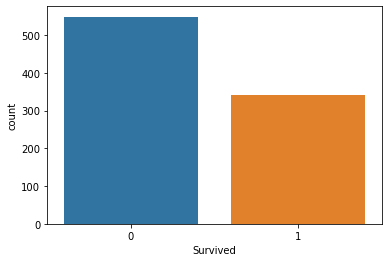

In [17]:
sns.countplot(x='Survived', data=titanic)
plt.show()

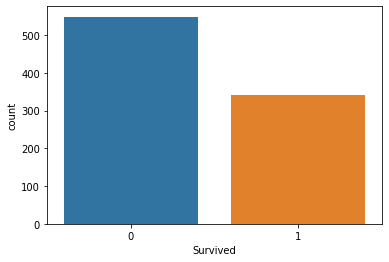

③ titanic['Survived']에 대해 성별 별로 구분하여 countplot을 그려 봅시다.

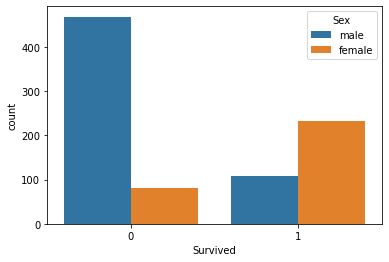

In [18]:
sns.countplot(x='Survived', data=titanic, hue='Sex')
plt.show()

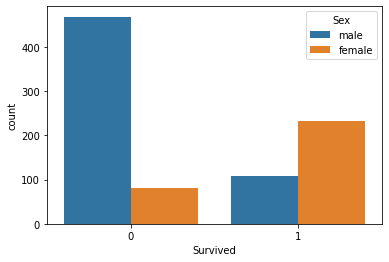

### 6) barplot : 평균비교 bar plot + error bar

① boston['chas'] 별 boston['medv']의 평균을 비교해 봅시다.

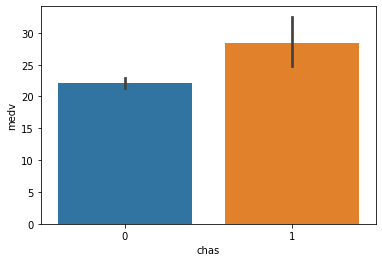

In [19]:
sns.barplot(x='chas', y='medv', data=boston)
plt.show()

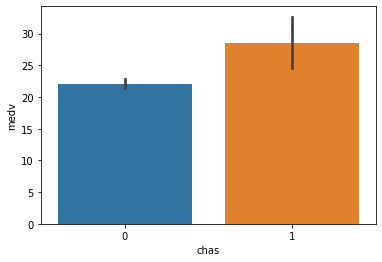

② air['Month'] 별 air['Ozone']의 평균을 비교해 봅시다.

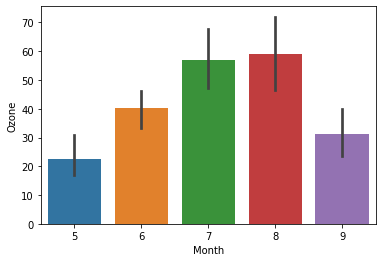

In [20]:
sns.barplot(x='Month', y='Ozone', data=air)
plt.show()

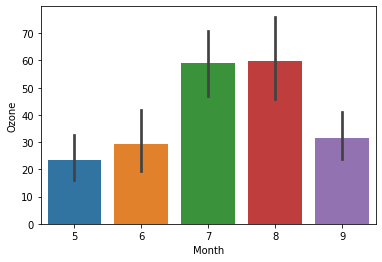

### 7) heatmap : 두 범주 집계 시각화

① [groupby] stock 데이터를 이용하여 year별, month별 평균 주가(close)를 집계하시오.

In [58]:
print(stock.head())

        Date     Open     High      Low    Close  Volume  DataSplit  Year  \
0 2014-09-30  2023.18  2029.17  2007.30  2020.09  322812          0  2014   
1 2014-10-01  2013.47  2013.47  1989.84  1991.54  351581          0  2014   
2 2014-10-02  1984.43  1985.06  1966.17  1976.16  322656          0  2014   
3 2014-10-06  1987.89  1988.39  1968.30  1968.39  325078          0  2014   
4 2014-10-07  1979.83  1982.96  1966.22  1972.91  328234          0  2014   

   Month  Weekday  
0      9        1  
1     10        2  
2     10        3  
3     10        0  
4     10        1  


In [21]:
tmp1 = stock.groupby(by=['Year', 'Month'], as_index=False)['Close'].mean()
print(tmp1)

    Year  Month        Close
0   2014      9  2020.090000
1   2014     10  1942.802857
2   2014     11  1959.647000
3   2014     12  1941.925714
4   2015      1  1920.992857
..   ...    ...          ...
56  2019      5  2086.898095
57  2019      6  2105.303158
58  2019      7  2079.480000
59  2019      8  1944.237619
60  2019      9  2045.205263

[61 rows x 3 columns]


② [pivot]  'Year','Month', 'Close' 으로 피봇시키시오.

In [22]:
tmp2 = tmp1.pivot('Year', 'Month', 'Close')
tmp2

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.090000,1942.802857,1959.647000,1941.925714
2015,1920.992857,1961.001176,2012.619091,2107.268182,2114.898889,2063.685909,2058.034348,1952.549000,1939.582500,2020.567143,2006.780952,1971.528571
2016,1894.651000,1900.610000,1976.502727,1996.170500,1966.675500,1977.029524,2002.482857,2036.656364,2042.555263,2036.032500,1981.746364,2021.666667
2017,2061.733500,2082.795000,2136.174545,2160.182500,2301.890000,2372.204286,2412.899048,2372.184545,2371.843810,2482.871250,2533.510000,2467.725789
2018,2520.937727,2439.104444,2451.570000,2458.224762,2461.300500,2394.507895,2284.253636,2283.796818,2307.325882,2153.476667,2083.333182,2070.128947
2019,2101.984091,2210.198824,2161.914500,2212.120455,2086.898095,2105.303158,2079.480000,1944.237619,2045.205263,NaN,NaN,NaN


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.090000,1942.802857,1959.647000,1941.925714
2015,1920.992857,1961.001176,2012.619091,2107.268182,2114.898889,2063.685909,2058.034348,1952.549000,1939.582500,2020.567143,2006.780952,1971.528571
2016,1894.651000,1900.610000,1976.502727,1996.170500,1966.675500,1977.029524,2002.482857,2036.656364,2042.555263,2036.032500,1981.746364,2021.666667
2017,2061.733500,2082.795000,2136.174545,2160.182500,2301.890000,2372.204286,2412.899048,2372.184545,2371.843810,2482.871250,2533.510000,2467.725789
2018,2520.937727,2439.104444,2451.570000,2458.224762,2461.300500,2394.507895,2284.253636,2283.796818,2307.325882,2153.476667,2083.333182,2070.128947
2019,2101.984091,2210.198824,2161.914500,2212.120455,2086.898095,2105.303158,2079.480000,1944.237619,2045.205263,NaN,NaN,NaN


③ heatmap을 그리시오.

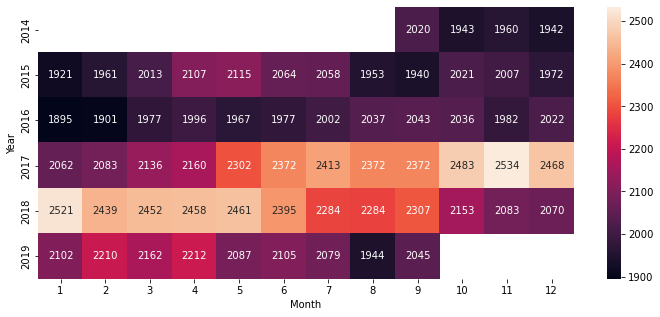

In [23]:
plt.figure(figsize=(12, 5))
sns.heatmap(tmp2, annot=True, fmt='.0f')    # 각각의 값들을 정수로 변환
plt.show()

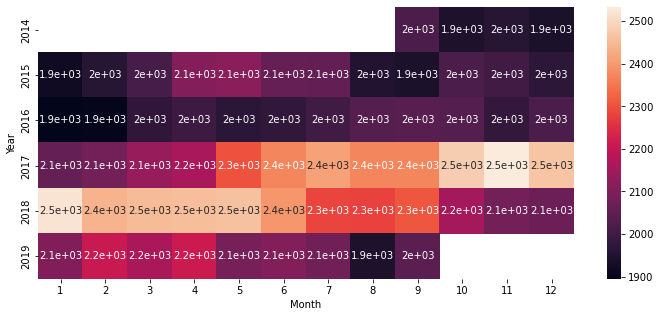

In [24]:
plt.figure(figsize=(12, 5))
sns.heatmap(tmp2, annot=True)
plt.show()

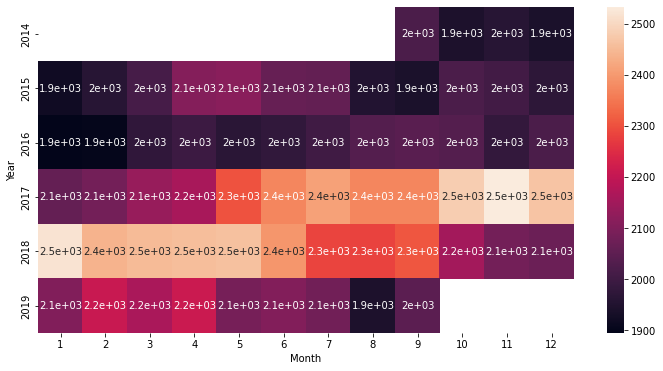

In [25]:
# np.array로 해주지 않으면 b.mean()의 경우 어레이가 아닌 리스트 형태이기 때문에 계산이 되지 않는다

a = np.array([1,2,3])
b = [1,2,3]

print(np.mean(a), np.mean(b))
print(a.mean(), b.mean())

2.0 2.0


AttributeError: 'list' object has no attribute 'mean'